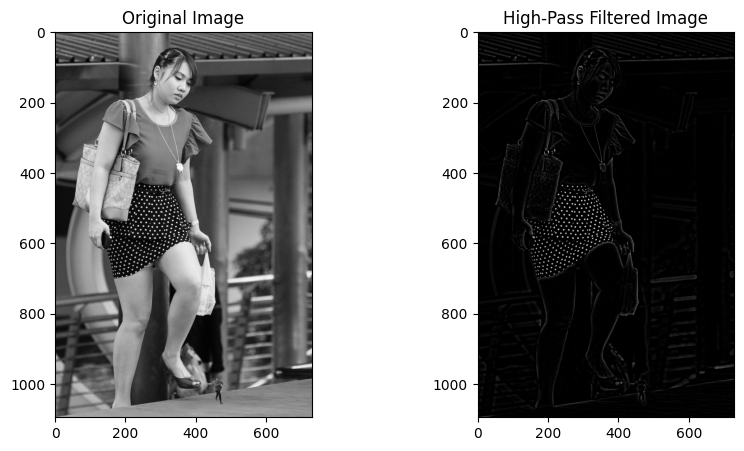

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the grayscale image using OpenCV
image = cv2.imread('../data/Stimuli_allRetain/6wlctn1ikkmmifxusm.jpg', cv2.IMREAD_GRAYSCALE)

# Function to apply High-Pass Filter using OpenCV
def apply_high_pass_filter(image):
    # Create a Gaussian Blur
    blurred = cv2.GaussianBlur(image, (21, 21), 0)

    # Subtract the blurred image from the original image to get the high frequencies
    high_pass = cv2.subtract(image, blurred)

    return high_pass

# Apply the high-pass filter
image_filtered = apply_high_pass_filter(image)

# Display the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(image_filtered, cmap='gray'), plt.title('High-Pass Filtered Image')
plt.show()

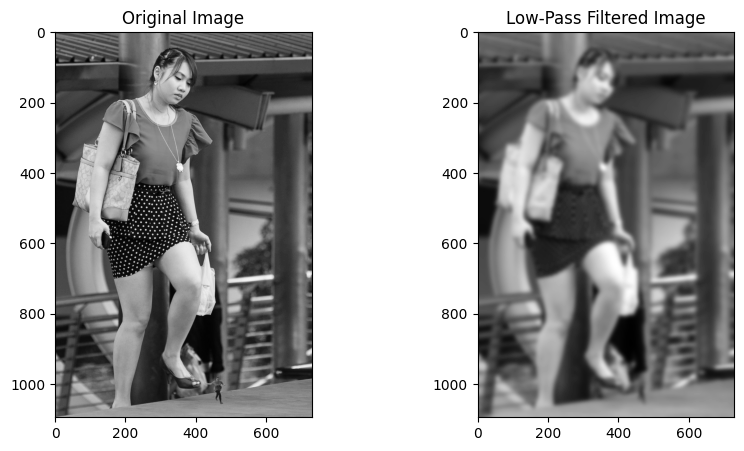

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image
image = cv2.imread('../data/Stimuli_allRetain/6wlctn1ikkmmifxusm.jpg', 0)

# Apply a Gaussian Blur (which is a type of low-pass filter)
low_pass_filtered_image = cv2.GaussianBlur(image, (35, 35), 0)

# Display the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(low_pass_filtered_image, cmap='gray'), plt.title('Low-Pass Filtered Image')
plt.show()

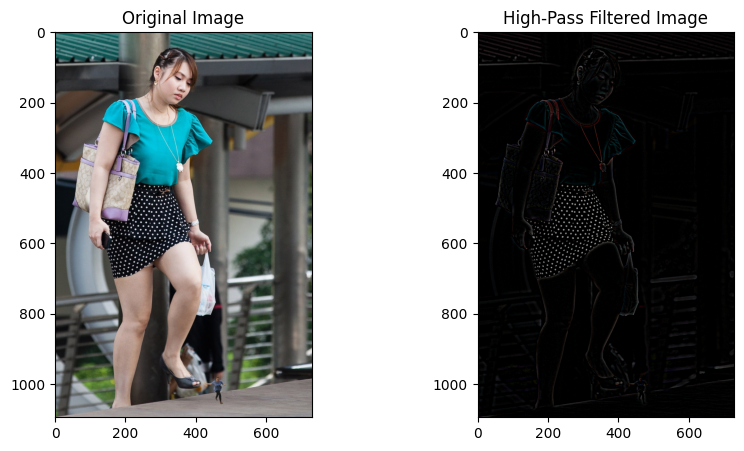

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the color image using OpenCV
image = cv2.imread('../data/Stimuli_allRetain/6wlctn1ikkmmifxusm.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function to apply High-Pass Filter to a single channel using OpenCV
def apply_high_pass_filter(image_channel):
    # Create a Gaussian Blur
    blurred = cv2.GaussianBlur(image_channel, (21, 21), 0)

    # Subtract the blurred image from the original image to get the high frequencies
    high_pass = cv2.subtract(image_channel, blurred)

    return high_pass

# Apply the filter to each channel
filtered_channels = [apply_high_pass_filter(image[:, :, i]) for i in range(3)]

# Merge the filtered channels back into a color image
image_filtered = cv2.merge(filtered_channels)

# Display the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(image_filtered), plt.title('High-Pass Filtered Image')
plt.show()


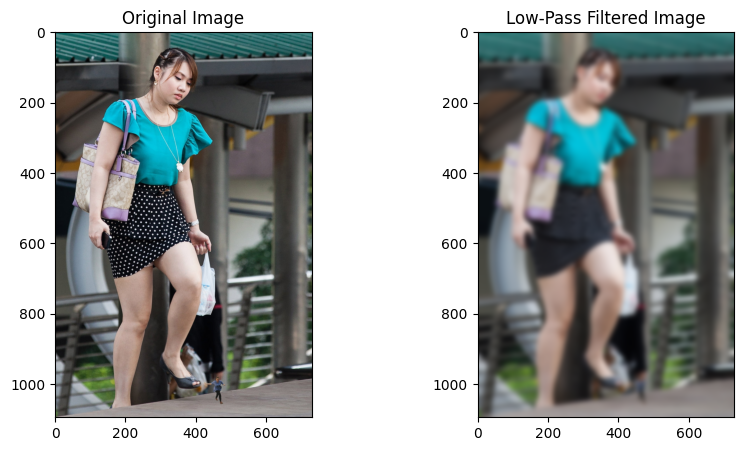

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the color image
image = cv2.imread('../data/Stimuli_allRetain/6wlctn1ikkmmifxusm.jpg')

# Convert the image from BGR (OpenCV format) to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply Gaussian Blur to each channel separately
blurred_image = np.zeros_like(image)
for i in range(3):  # Loop over the three channels
    blurred_image[:, :, i] = cv2.GaussianBlur(image[:, :, i], (45, 45), 0)

# Display the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(blurred_image), plt.title('Low-Pass Filtered Image')
plt.show()


In [5]:
import pandas as pd
import os
import re
import joblib
import cv2
import numpy as np
from matplotlib import pyplot as plt

face_bbox_data = pd.read_csv('../data/PyFeat_output_1127.csv')

face_bbox_data['input'] = face_bbox_data['input'].apply(os.path.basename)
face_bbox_data = face_bbox_data.get(['input', 'FaceRectX', 'FaceRectY', 'FaceRectWidth', 'FaceRectHeight']).set_index('input')
face_bbox_data

,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight
input,,,,
obj365_train_000000180061_000.jpg,260.486972,46.854288,48.373390,61.719206
frame_kuoqwjktxwrqc84e_v1.jpg,147.979197,227.669088,61.987096,77.753051
obj365_train_000000273477_000.jpg,284.355927,49.809890,49.281918,60.268400
openimages_cf1b7371027f64d9_000.jpg,275.326660,80.331284,42.382843,54.695694
COCO_train2014_000000105310.jpg,414.618083,123.342922,96.630086,134.600178
...,...,...,...,...
COCO_train2014_000000034815.jpg,691.553308,98.560012,54.537678,68.286618
COCO_val2014_000000509526_sp_00.jpg,405.151012,169.741296,39.040616,41.345366
obj365_train_000000278038_000.jpg,329.387606,108.505245,53.672817,68.708359


Body bbox have problems

In [6]:
input_list = []
bbox_list = []
count = 0
for folder in os.listdir('../data/PARE'):
    with open(f'../data/PARE/{folder}/pare_output.pkl', 'rb') as f:
        data = joblib.load(f)
    
    for key, value in data.items():
        input_list.append(folder)
        bbox_list.append(value['bboxes'][0])
    # bbox_data[0], bbox_data[1] = bbox_data[0] - bbox_data[2]/2, bbox_data[1] - bbox_data[3]/2
    # bbox_data[2], bbox_data[3] = bbox_data[0] + bbox_data[2]/2, bbox_data[1] + bbox_data[3]/2
    
body_bbox_data = pd.DataFrame(bbox_list, columns=['BodyRectX','BodyRectY','BodyRectWidth','BodyRectHeight'])
body_bbox_data = body_bbox_data.assign(input=input_list).set_index('input')
body_bbox_data

,BodyRectX,BodyRectY,BodyRectWidth,BodyRectHeight
input,,,,
63cpdzbm913mm38ql2.jpg,566.959579,342.372574,510.279903,510.279903
6wlctn1ikkmmifxusm.jpg,147.379375,301.029148,503.149345,503.149345
6zyacv8iwxtx07k7yz.jpg,140.599748,303.134106,567.671627,567.671627
9eequqtu0fpr63kexs.jpg,508.415176,311.821564,548.101857,548.101857
9pu0lzqs47kj058uea.jpg,217.736944,301.534554,423.462648,423.462648
...,...,...,...,...
sun_bjndqdyznuhfagyc.jpg,662.632324,382.828842,331.302519,331.302519
sun_blxtspeqplpgardy.jpg,221.269470,302.380417,507.990878,507.990878
sun_bokbskqmjnjpdput.jpg,183.438087,228.404976,332.458281,332.458281


In [7]:
face_body_bbox_data = face_bbox_data.merge(body_bbox_data, left_index=True, right_index=True)
# face_body_bbox_data.to_csv('../data/face_body_bbox.csv')

In [8]:
# Function to remove '_v1' from the filename
def remove_version(filename):
    return re.sub(r'_v\d+', '', filename)

# X, Y, W, H
def get_bbox(img_name, bbox_data):
    return np.array(bbox_data.loc[img_name]).astype(int)

# bbox:[x,y,w,h]
def scale_bbox(scale_x, scale_y, bbox):
    scaled_x = (scale_x * np.array([bbox[0], bbox[2]])).astype(int)
    scaled_y = (scale_y * np.array([bbox[1], bbox[3]])).astype(int)
    return [scaled_x[0],scaled_y[0],scaled_x[1],scaled_y[1]]

In [9]:
import cv2
import numpy as np

def partial_blurr(img_path, blur_radius1, blur_radius2, face_bbox, body_bbox):
    image = cv2.imread(img_path)

    # high gaussian blur
    high_blurred_image = cv2.GaussianBlur(image, (blur_radius1, blur_radius1), 0)

    # make a copy of the original image
    low_blurred_image = image.copy()

    # face bbox only for now
    x, y, w, h = face_bbox
    roi = low_blurred_image[y:y+h, x:x+w]

    # low Gaussian blur to the ROI (region of interest)
    low_blurred_roi = cv2.GaussianBlur(roi, (blur_radius2, blur_radius2), 0)

    # replace the region
    low_blurred_image[y:y+h, x:x+w] = low_blurred_roi

    # create a mask with same dimensions as image
    mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.float32)

    # define center and radius
    center_x, center_y = x + w // 2, y + h // 2
    # use avg of w and h to get a bigger radius in order avoid scaling issues with bbox
    radius = ((w + h) / 2) // 2

    # create smooth circular gradient for the mask
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            # calculate distance from center
            distance = np.sqrt((i - center_y) ** 2 + (j - center_x) ** 2)
            # scale the distance (center: 1, edge: 0)
            mask[i, j] = np.clip((radius - distance) / radius, 0, 1)
    
    # normalize the mask to the range [0, 255] for visualization
    normalized_mask = (mask * 255).astype(np.uint8)

    # smooth the circular gradient
    sum_blur_radius = blur_radius1+blur_radius2
    smooth_radius = (sum_blur_radius//2) - 1 if (sum_blur_radius//2) % 2 == 0 else (sum_blur_radius//2) - 2
    mask = cv2.GaussianBlur(mask, (smooth_radius, smooth_radius), 0)

    # expand to 3 channels for image
    mask = cv2.merge([mask, mask, mask])

    # combine the high blurred image and the low blurred image using the mask
    result = (low_blurred_image * mask + high_blurred_image * (1 - mask)).astype(np.uint8)
    result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

    return result, normalized_mask

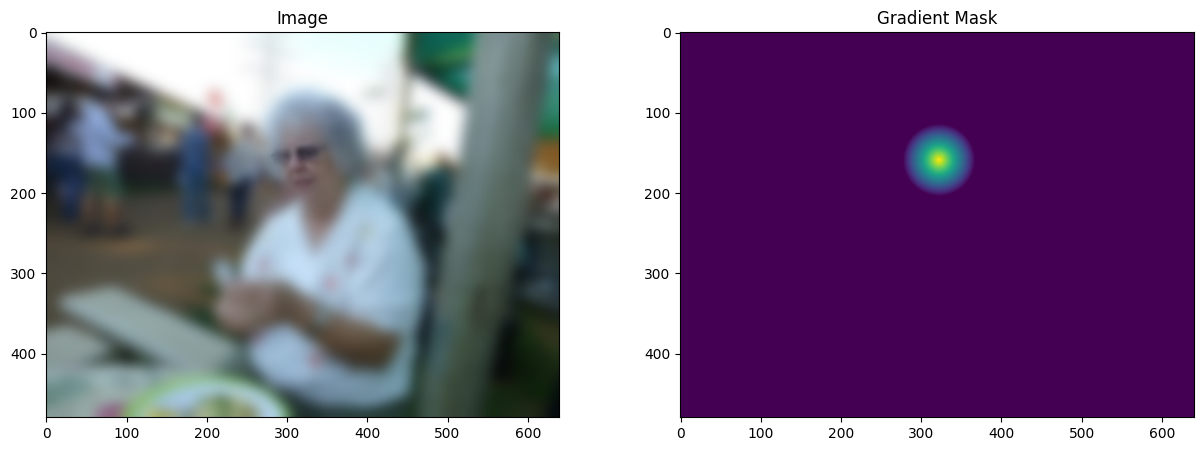

In [10]:
def display_blurred_image(filename):
    original = remove_version(filename)
    bbox = get_bbox(filename, face_body_bbox_data)

    # only using the first bounding box for now, not sure what the others are
    # after examanation of 1 image, all bbox seems to be the same
    if type(bbox[0]) is not int:
        bbox = bbox[0]

    dx,dy,dc = cv2.imread(os.path.join('../data/Stimuli_allRetain', original)).shape
    dx_ps,dy_ps,dc_ps = cv2.imread(os.path.join('../data/Stimuli_psRec', filename)).shape
    x_scale, y_scale = dx/dx_ps, dy/dy_ps
    scaled_face_bbox = scale_bbox(x_scale, y_scale, bbox[:4])
    # scaled_body_bbox = scale_bbox(x_scale, y_scale, bbox[4:])
    # partial_blurr(os.path.join('../data/Stimuli_psRec', filename), 51, 15, bbox[:4], bbox[4:])
    result, normalized_mask = partial_blurr(os.path.join('../data/Stimuli_allRetain', original), 51, 15, scaled_face_bbox, None)
    
    # display the result
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(result)
    plt.title('Image')
    plt.subplot(1, 2, 2)
    plt.imshow(normalized_mask)
    plt.title('Gradient Mask')
    plt.show()

train_data = pd.read_csv('../data/train.csv')
display_blurred_image(train_data.get('imageName')[2])

In [11]:
from tqdm import tqdm

def save_blurred_image(filename):
    if not os.path.isfile(f'../data/lp_images/{filename}'):
        original = remove_version(filename)
        bbox = get_bbox(filename, face_body_bbox_data)

        if type(bbox[0]) is not np.int32:
            bbox = bbox[0]

        dx,dy,dc = cv2.imread(os.path.join('../data/Stimuli_allRetain', original)).shape
        dx_ps,dy_ps,dc_ps = cv2.imread(os.path.join('../data/Stimuli_psRec', filename)).shape
        x_scale, y_scale = dx/dx_ps, dy/dy_ps
        scaled_face_bbox = scale_bbox(x_scale, y_scale, bbox[:4])
        # scaled_body_bbox = scale_bbox(x_scale, y_scale, bbox[4:])
        # partial_blurr(os.path.join('../data/Stimuli_psRec', filename), 51, 15, bbox[:4], bbox[4:])
        result, normalized_mask = partial_blurr(os.path.join('../data/Stimuli_allRetain', original), 51, 15, scaled_face_bbox, None)
        cv2.imwrite(f'../data/lp_images/{filename}', cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
        
train_data = pd.read_csv('../data/train.csv')
for i in tqdm(train_data.index):
    save_blurred_image(train_data.get('imageName')[i])

100%|██████████| 900/900 [00:00<00:00, 21947.07it/s]


In [12]:
test_data = pd.read_csv('../data/test.csv')
for i in tqdm(test_data.index):
    save_blurred_image(test_data.get('imageName')[i])

100%|██████████| 113/113 [03:22<00:00,  1.80s/it]


In [13]:
val_data = pd.read_csv('../data/val.csv')
for i in tqdm(val_data.index):
    save_blurred_image(val_data.get('imageName')[i])

100%|██████████| 112/112 [06:56<00:00,  3.72s/it]
